# Gini Index

## Pooled OLS regression

This is the 3rd notebook that attempts to use a pooled OLS regression model to infer the relationship between the Gini index of a country and its respective macroeconomic indicators.

In [1]:
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsap
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/Users/afifmazhar/Desktop/Data Science/Data Science Projects/Econometrics/Gini Index/data/final_data.csv', header = 0)
data.drop('Unnamed: 0', axis = 1, inplace=True)

In [6]:
data.head()

,Country,Country_code,Year,Gini,real_GDP,cpi,ip,unrate
0,Australia,AUS,1993-01-01,33.95,221619.25,1.753839,56.460825,10.880851
1,Australia,AUS,1994-01-01,33.95,232355.75,1.968183,59.257840,9.713438
2,Australia,AUS,1995-01-01,32.60,239223.25,4.623810,60.950436,8.471992
3,Australia,AUS,1996-01-01,33.95,248867.00,2.626375,63.428274,8.513908
4,Australia,AUS,1997-01-01,33.95,260326.25,0.228107,64.264320,8.362599


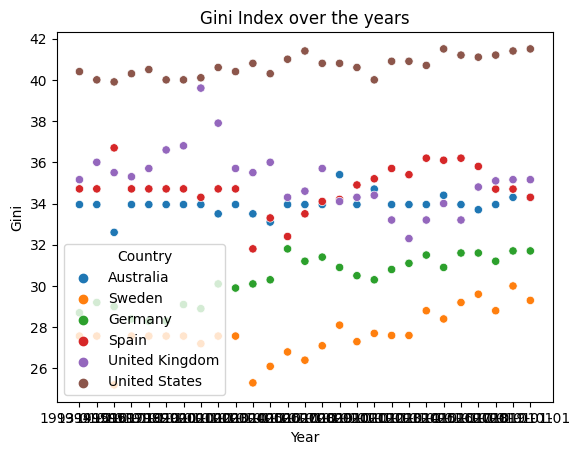

In [19]:
# visualize the Gini index by country over the years
sns.scatterplot(x=data['Year'], y=data['Gini'],
                hue=data['Country']).set(title=
                'Gini Index over the years')
plt.show()

In [10]:
#Define the variables and create the x and y values
y = 'Gini'
X = ['real_GDP','cpi','ip','unrate']
pool_y=data[y]
pool_X=data[X]

#Add the placeholder for the regression intercept β_0.
pool_X = sm.add_constant(pool_X)
#Build the OLS model
pooled_olsr_model = sm.OLS(endog=pool_y, exog=pool_X)
#Fit the model
pooled_olsr_model_results = pooled_olsr_model.fit()
#Print the results summary
print('===============================================================================')
print('================================= Pooled OLS ==================================')
print(pooled_olsr_model_results.summary())

================================= Pooled OLS ==================================
                            OLS Regression Results                            
Dep. Variable:                   Gini   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     195.8
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           6.43e-60
Time:                        00:38:37   Log-Likelihood:                -317.65
No. Observations:                 162   AIC:                             645.3
Df Residuals:                     157   BIC:                             660.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [11]:
print(pooled_olsr_model_results.resid)

0     -0.176479
1     -0.335495
2     -1.603017
3     -0.428976
4     -0.587326
         ...   
157    1.027323
158    0.963636
159    0.916498
160    0.899572
161    1.000232
Length: 162, dtype: float64


In [12]:
print('Mean value of residual errors='+str(pooled_olsr_model_results.resid.mean()))

Mean value of residual errors=-1.4254715377903245e-14


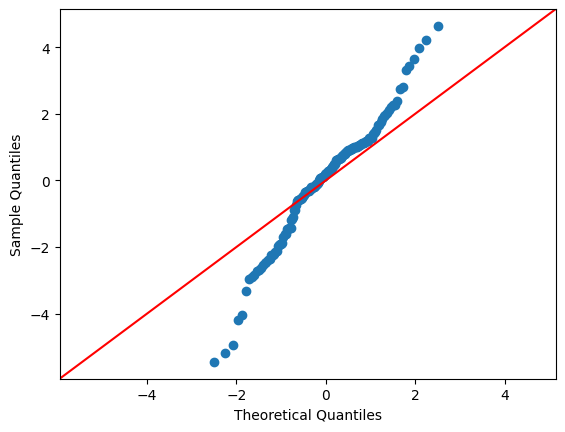

In [13]:
sm.qqplot(data=pooled_olsr_model_results.resid, line='45')
plt.show()

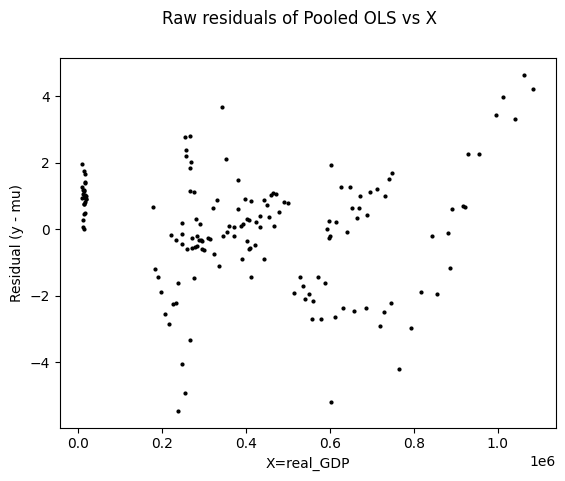

In [15]:
fig, ax = plt.subplots()
fig.suptitle('Raw residuals of Pooled OLS vs X')
plt.ylabel('Residual (y - mu)')
plt.xlabel('X='+str(X[0]))
ax.scatter(pool_X[X[0]], pooled_olsr_model_results.resid, s=4, c='black', label='Residual Error')
plt.show()

In [16]:
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:',
        'F-statistic:', 'F-test\'s ' 'p-value:']
 
results = het_white(resid=pooled_olsr_model_results.resid, exog=pool_X)
 
print('Results of the White test for heteroskedasticity of residual errors ===> ')
 
print(lzip(keys,results))

Results of the White test for heteroskedasticity of residual errors ===> 
[('Lagrange Multiplier statistic:', 65.1841283200003), ("LM test's p-value:", 1.4183034343708675e-08), ('F-statistic:', 7.069433301413882), ("F-test's p-value:", 5.1337204580011616e-11)]


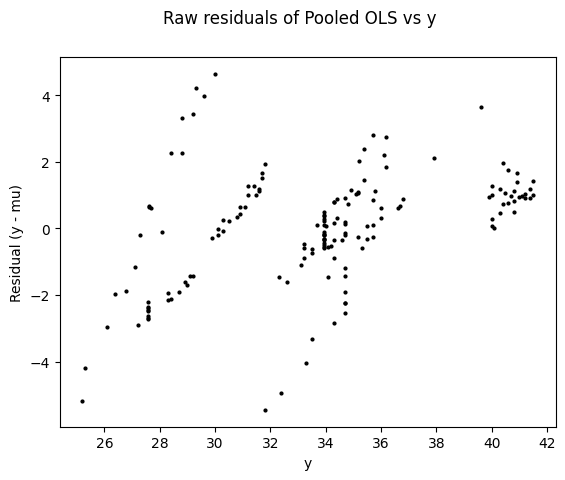

In [17]:
fig, ax = plt.subplots()
fig.suptitle('Raw residuals of Pooled OLS vs y')
plt.ylabel('Residual (y - mu)')
plt.xlabel('y')
ax.scatter(pool_y, pooled_olsr_model_results.resid, s=4, c='black', label='Residual Error')
plt.show()

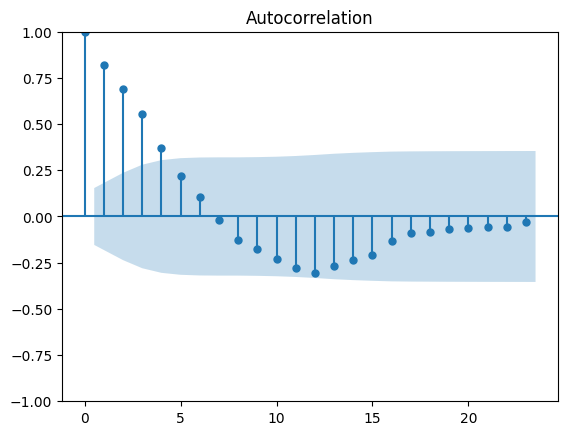

In [18]:
tsap.plot_acf(x=pooled_olsr_model_results.resid)
plt.show()